# Cleaning up the covid data for since 2020 till this year (2022).

In [8]:
library(visdat)
library(tidyverse)
library(readxl)
library(dplyr)
library(tidytext)
library(textdata)
library(rvest) # to scrape data from websites
library(xml2) # to effctively work with HTML or XML in R
library(magrittr) 

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.8     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘rvest’


The following object is masked from ‘package:readr’:

    guess_encoding



Attaching package: ‘magrittr’


The following object is masked from ‘package:purrr’:

    set_names


The following object is masked from ‘package:tidyr’:

    extract




In [9]:
options(repr.plot.width=15, repr.plot.height=8)

https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/weekly-deaths.csvhttps://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/weekly-deaths.csv> We'll read the data straight from the ministry of Health git repository, that way if the data is updated, we'll get the latest dataset for covid cases from 2020 till todate.

In [10]:
covid_cases_data = read_csv("https://raw.githubusercontent.com/minhealthnz/nz-covid-data/main/cases/covid-cases.csv", col_names = TRUE)

Rows: 1805260 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (5): Case Status, Sex, Age group, DHB, Overseas travel
lgl  (1): Historical
date (1): Report Date

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [11]:
covid_cases_data %>% tail()

Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
2020-03-05,Probable,Male,70 to 79,Managed Isolation & Quarantine,Yes,NA
2020-03-05,Probable,Female,70 to 79,Managed Isolation & Quarantine,Yes,NA
2020-03-04,Confirmed,Male,40 to 49,Managed Isolation & Quarantine,Yes,NA
2020-03-04,Confirmed,Male,40 to 49,Counties Manukau,NA,NA
2020-03-02,Confirmed,Female,30 to 39,Managed Isolation & Quarantine,Yes,NA
2020-02-26,Confirmed,Female,60 to 69,Managed Isolation & Quarantine,Yes,NA


In [12]:
covid_cases_data %>% arrange('Report Date') %>% head()
colnames(covid_cases_data)[1] <- "Date"
covid_cases_data1 <- covid_cases_data
colnames(covid_cases_data1)[1] <- "Date"

Report Date,Case Status,Sex,Age group,DHB,Overseas travel,Historical
<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>
2022-10-11,Confirmed,Male,80 to 89,Tairawhiti,NA,NA
2022-10-11,Confirmed,Male,60 to 69,Waitemata,NA,NA
2022-10-11,Confirmed,Female,60 to 69,Waitemata,NA,NA
2022-10-11,Confirmed,Female,30 to 39,Waikato,NA,NA
2022-10-11,Confirmed,Male,60 to 69,Waitemata,NA,NA
2022-10-11,Confirmed,Male,20 to 29,Waitemata,NA,NA


In [13]:
# covid_cases_data1$Date <- as.character(covid_cases_data1$Date)
# covid_cases_data1 %<>%
#     separate(Date, c("Year","Month", "Day"), "-")

In [14]:
# summarise_data_by_year <- covid_cases_data1 %>% group_by(Year) %>% summarise(total_cases = n())
# summarise_data_by_year

In [15]:
summarise_data_by_date <- covid_cases_data %>% group_by(Date) %>% summarise(total_cases = n())
summarise_data_by_date

Date,total_cases
<date>,<int>
2020-02-26,1
2020-03-02,1
2020-03-04,2
2020-03-05,2
2020-03-06,1
2020-03-12,1
2020-03-13,1
2020-03-14,1
2020-03-15,1


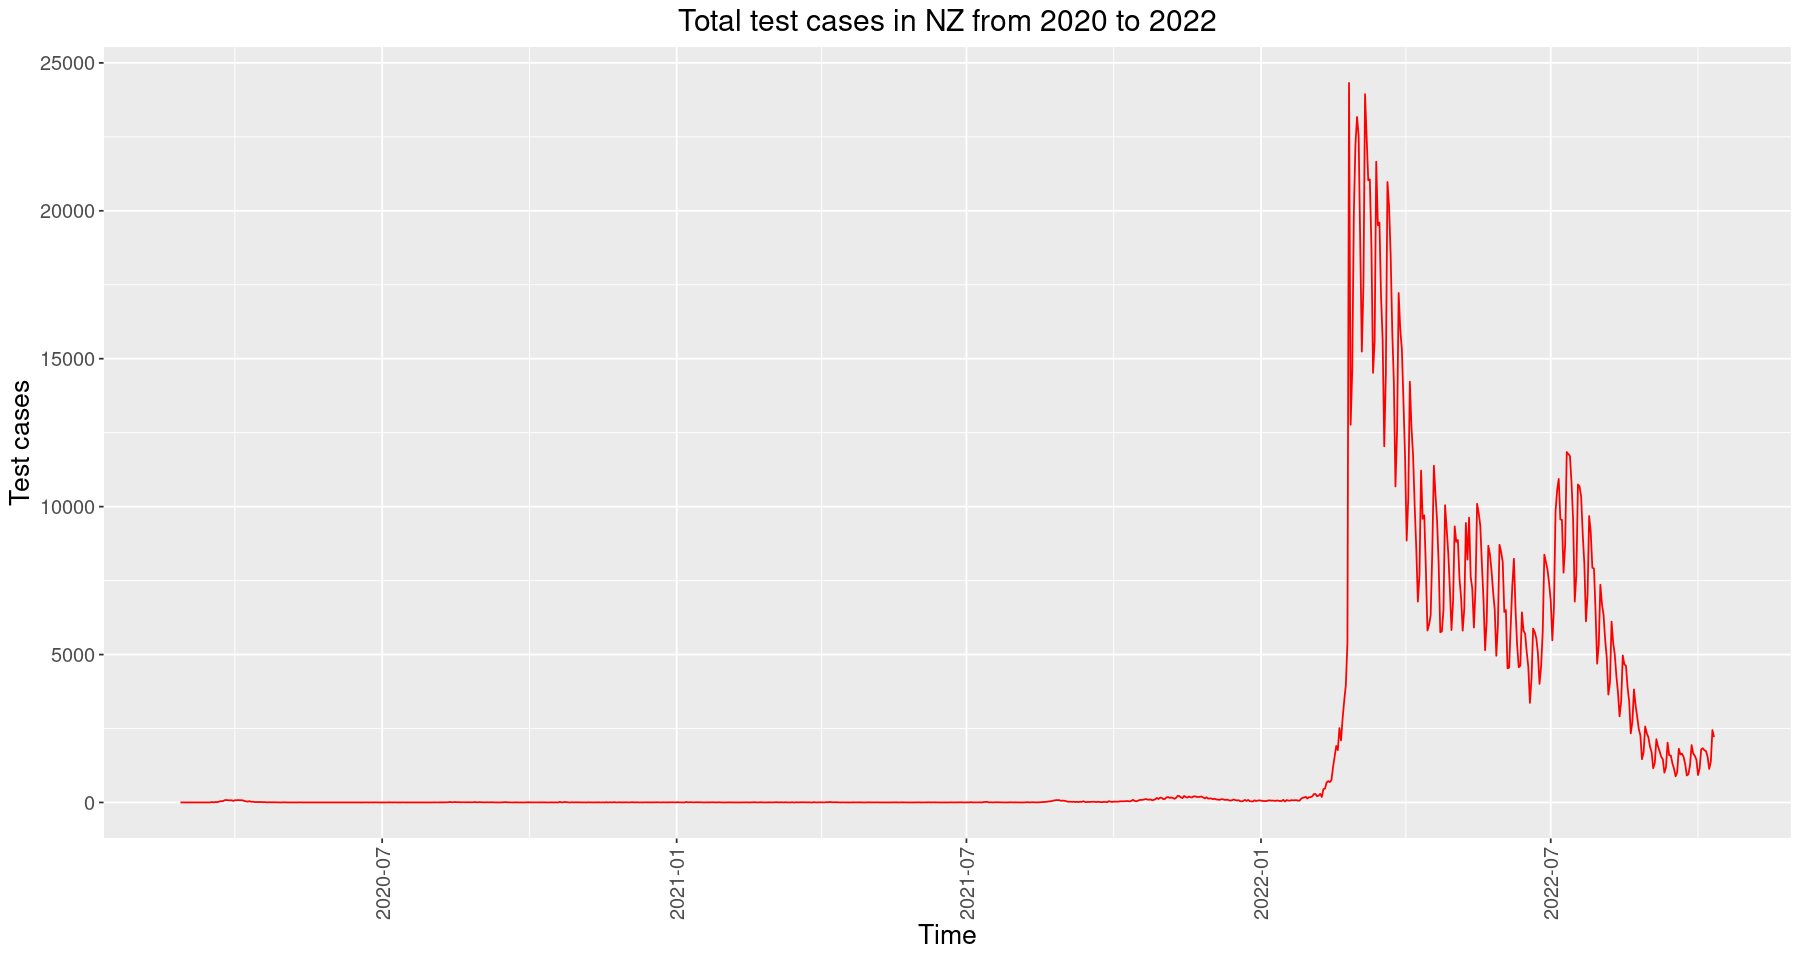

In [16]:
test_data_graph_by_date <- summarise_data_by_date %>% 
        ggplot(aes(x=Date, y=total_cases)) + 
        ggtitle('Total test cases in NZ from 2020 to 2022') + 
        geom_line(position = position_dodge(0.2), color="red") +
        # geom_point(position = position_dodge(0.2), size=2) +
        # geom_text(aes(label= total_cases), position=position_dodge(width=0.9), vjust=-0.75) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=16), 
              axis.text.x = element_text(angle = 90, vjust = 0.5, hjust = 1, size=12),
              axis.text.y = element_text(size=12),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("Time") + ylab("Test cases")
test_data_graph_by_date

In [17]:
summarise_data_by_city <- covid_cases_data %>% group_by(DHB) %>% summarise(total_cases = n())

In [18]:
summarise_data_by_city[summarise_data_by_city == "Auckland"] <- "Auckland City"
summarise_data_by_city[summarise_data_by_city == "Bay of Plenty"] <- "Bay Of Plenty"
summarise_data_by_city[summarise_data_by_city == "Canterbury/West Coast"] <- "Canterbury"
summarise_data_by_city[summarise_data_by_city == "MidCentral"] <- "Central"
summarise_data_by_city[summarise_data_by_city == "Counties Manukau"] <- "Counties/Manukau"
summarise_data_by_city[summarise_data_by_city == "Hawke's Bay"] <- "Eastern"
summarise_data_by_city[summarise_data_by_city == "Nelson Marlborough"] <- "Tasman"
summarise_data_by_city[summarise_data_by_city == "Capital & Coast/Hutt"] <- "Wellington"
colnames(summarise_data_by_city)[1] <- "district"
summarise_data_by_city

district,total_cases
<chr>,<int>
Auckland City,171567
Bay Of Plenty,82598
Canterbury,247665
Wellington,184754
Counties/Manukau,207881
Eastern,62077
Lakes,36886
Managed Isolation & Quarantine,27219
Central,64015


Crime data was collected from the police NZ statistics website using the following URL:
https://www.police.govt.nz/about-us/publications-statistics/data-and-statistics?nondesktop

In [19]:
crime_by_region <- read_csv("CrimeByRegion.csv", show_col_types = FALSE)
crime_by_region
colnames(crime_by_region) <- c("district", "year", "proceedings")
crime_by_region_bf <- crime_by_region %>% 
            filter(year < "2020") %>% 
            group_by(district) %>%
            summarize(proceedings = sum(proceedings))
# colnames(crime_by_region_bf)[2] <- "proceedings_precovid"
# crime_by_region_bf
crime_by_region_af <- crime_by_region %>% 
            filter(year > "2020") %>% 
            group_by(district) %>%
            summarize(proceedings = sum(proceedings))
# colnames(crime_by_region_af)[2] <- "proceedings_postcovid"
# crime_by_region_af

Police District,Year of Year Month,Proceedings
<chr>,<dbl>,<dbl>
Not Specified (District),2022,3
Southern,2022,4785
Canterbury,2022,7368
Tasman,2022,3452
Wellington,2022,6254
Central,2022,6887
Eastern,2022,5777
Bay Of Plenty,2022,8810
Waikato,2022,6955


In [20]:
test_crime_bf_table <- merge(crime_by_region_bf, summarise_data_by_city, by="district")
test_crime_bf_table %<>% mutate(period = "Before")
# test_crime_bf_table
test_crime_af_table <- merge(crime_by_region_af, summarise_data_by_city, by="district")
test_crime_af_table %<>% mutate(period = "After")
# test_crime_af_table
total_crime_data_table <- test_crime_bf_table %>% rbind(test_crime_af_table)
# total_crime_data_table %<>% mutate(change_rate = round((proceedings_postcovid-proceedings_precovid)/proceedings_postcovid*100, 2))
# total_crime_data_table$proceedings%>%typeof()
# total_crime_data_table$total_cases%>%typeof()
total_crime_data_table

district,proceedings,total_cases,period
<chr>,<dbl>,<int>,<chr>
Auckland City,21672,171567,Before
Bay Of Plenty,28762,82598,Before
Canterbury,25361,247665,Before
Central,25002,64015,Before
Counties/Manukau,32979,207881,Before
Eastern,19569,62077,Before
Northland,12118,54326,Before
Southern,17023,131872,Before
Tasman,10673,53430,Before


Warning message:
“position_dodge requires non-overlapping x intervals”


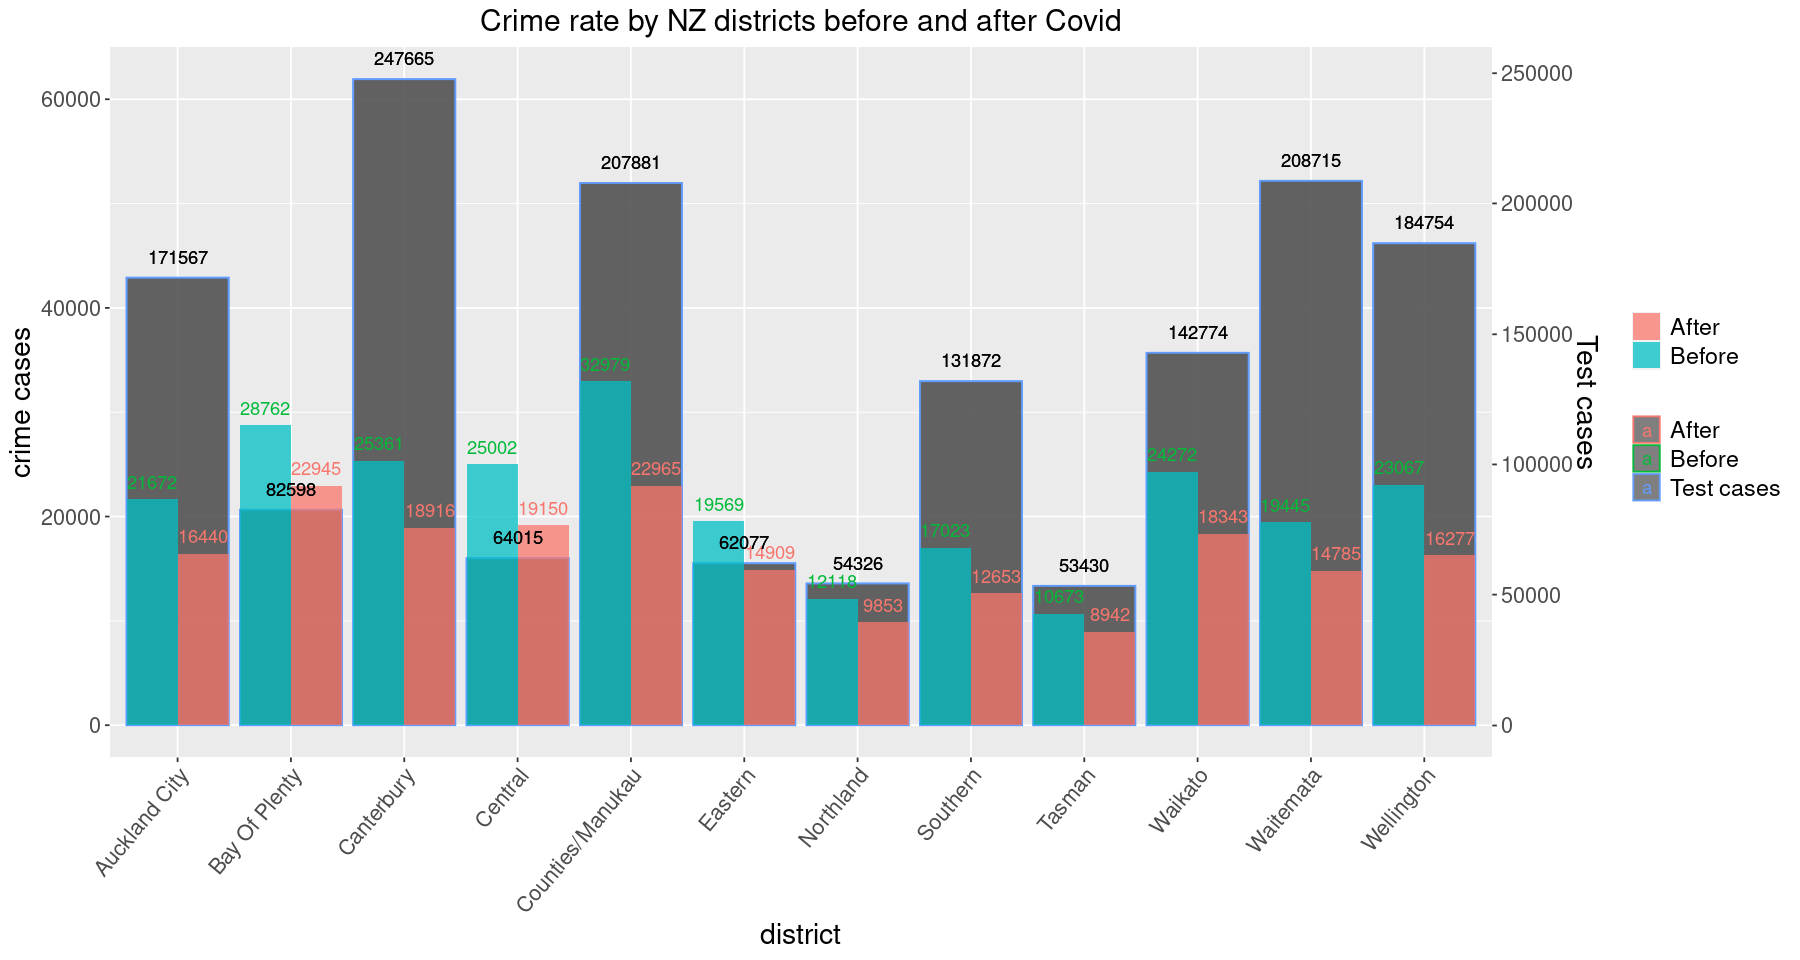

In [21]:
total_crime_data_graph <- total_crime_data_table %>%
        ggplot(aes(x=district)) + 
        ggtitle('Crime rate by NZ districts before and after Covid') + 
        geom_bar(aes(y=total_cases/4, color="Test cases"), stat = "identity", position = position_dodge(), alpha = 0.75, size = 0.5) +
        geom_bar(aes(y=proceedings, fill=period), stat = "identity", position = position_dodge(-0.9), alpha = 0.75, size = 0.5) +
        geom_text(aes(y=proceedings, label=proceedings, color = period), position=position_dodge(-0.9), vjust=-0.75) +
        geom_text(aes(y=total_cases/4, label=total_cases), position=position_dodge(width=0.2), vjust=-1) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(angle = 50, vjust = 1, hjust = 1, size=13),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        scale_y_continuous(
                name = "crime cases",
                sec.axis = sec_axis(~.*4, name="Test cases")) +
        xlab("district")
total_crime_data_graph

In [22]:
crime_types <- read_csv("CrimeType.csv", show_col_types = FALSE)
colnames(crime_types) <- c("type", "year", "method", "person", "area", "district", "month", "ethnicity", "subdivision", "proceedings")
crime_types$proceedings <- as.numeric(crime_types$proceedings)
crime_type_data <- crime_types %>% group_by(type, year) %>% summarise(cases=sum(proceedings))
crime_type_data %<>% 
        filter(year != 2020) %>% 
        mutate(period = if_else(year < 2020, "Before", "After")) %>% 
        group_by(type, period) %>% 
        summarise(cases = sum(cases))
crime_type_data
# crime_type_converter <- crime_types %>% 
#         select(-year) %>%
#         group_by(type) %>%
#         summarise(cases = sum(proceedings)) %>%
#         mutate(type_num = rownames(crime_type_converter)) %>%
#         select(-cases)
# crime_type_converter

# total_crime_type_table <- merge(crime_type_data, crime_type_converter, by="type")
# total_crime_type_table

`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'type'. You can override using the
`.groups` argument.


type,period,cases
<chr>,<chr>,<dbl>
"Abduction, Harassment and Other Related Offences Against a Person",After,7573
"Abduction, Harassment and Other Related Offences Against a Person",Before,9443
Acts Intended to Cause Injury,After,28829
Acts Intended to Cause Injury,Before,38618
Dangerous or Negligent Acts Endangering Persons,After,22238
Dangerous or Negligent Acts Endangering Persons,Before,27245
"Fraud, Deception and Related Offences",After,4050
"Fraud, Deception and Related Offences",Before,5273
Homicide and Related Offences,After,325


Warning message:
“position_dodge requires non-overlapping x intervals”


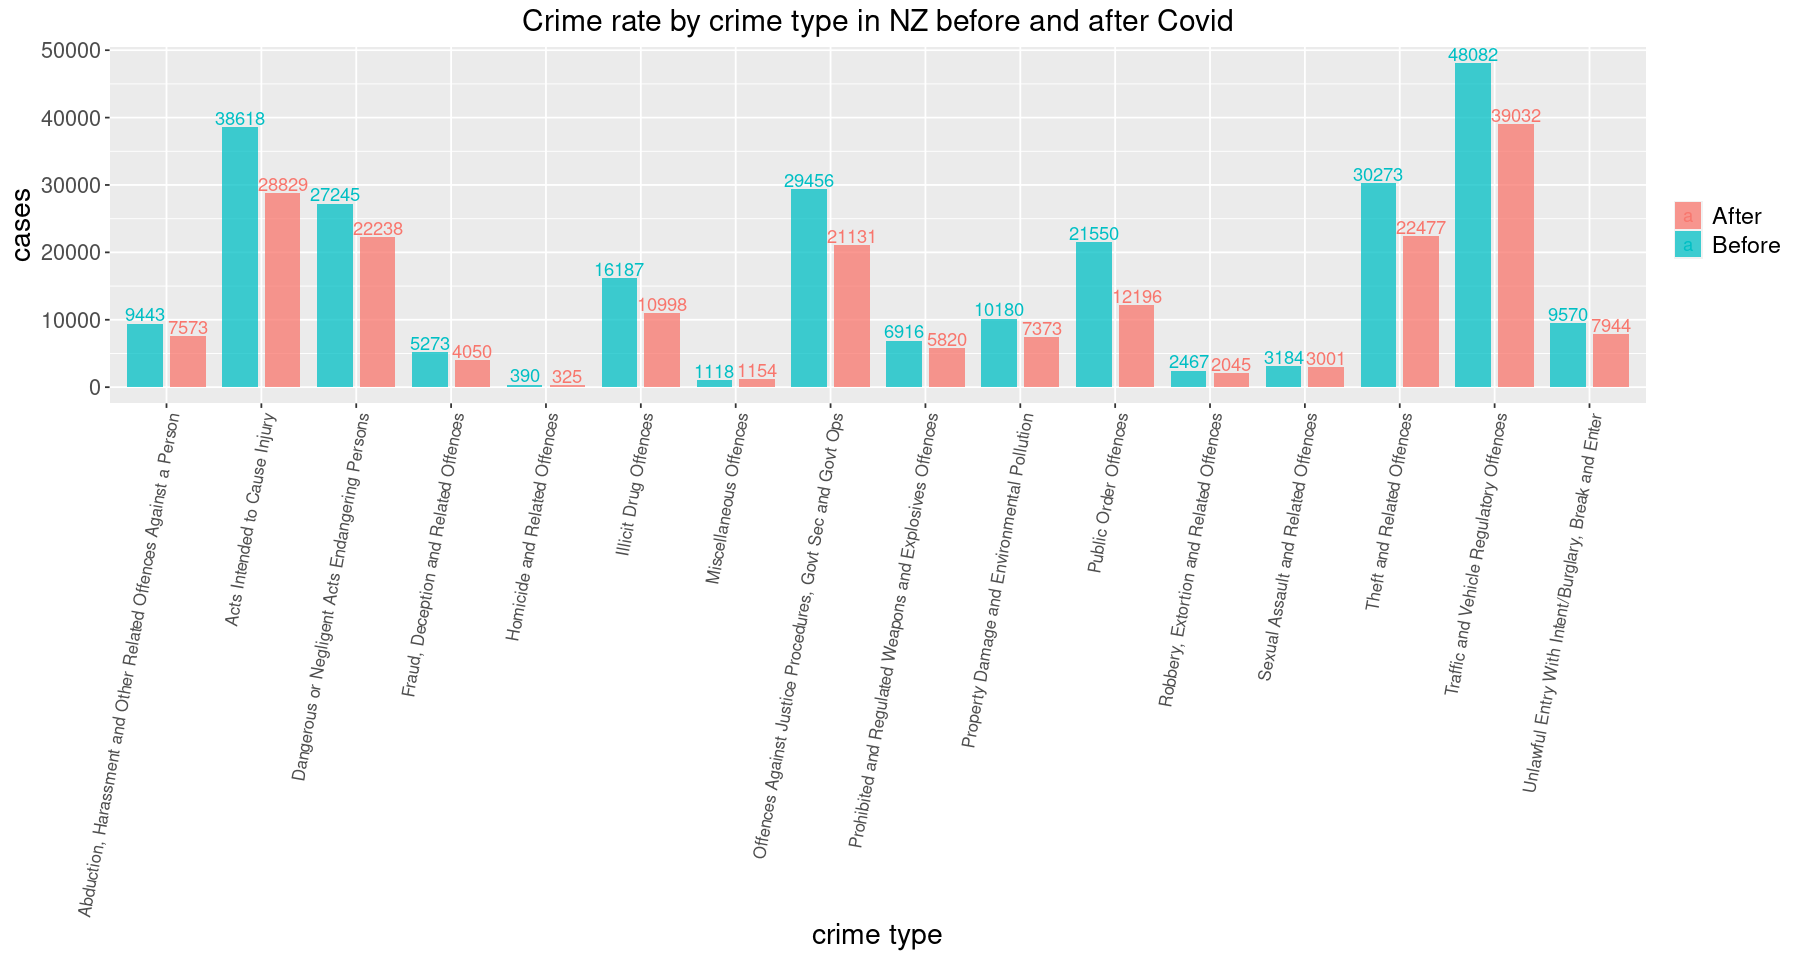

In [23]:
crime_type_data_graph <- crime_type_data %>%
        ggplot(aes(x=type, y=cases, fill=period)) + 
        ggtitle('Crime rate by crime type in NZ before and after Covid') + 
        geom_bar(stat = "identity", position = position_dodge(width = -0.9), alpha = 0.75, size = 0.5, width = 0.75) +
        geom_text(aes(label=cases, color = period), position=position_dodge(width = -0.9), vjust=-0.15) +
        theme(plot.title = element_text(hjust = 0.5, size=18), 
              axis.title=element_text(size=17), 
              axis.text.x = element_text(angle = 80, vjust = 1, hjust = 1, size=10),
              axis.text.y = element_text(size=13),
              legend.title=element_blank(),
              legend.position = "right", 
              legend.text = element_text(size=14)) + 
        xlab("crime type") + ylab("cases")
crime_type_data_graph